<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [14]:
import pandas as pd


Load the dataset into a dataframe.


<h2>Read Data</h2>



In [15]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [16]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [18]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [19]:
df = pd.read_csv(file_name)

### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


In [20]:
df.shape

(11398, 85)

In [21]:
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

Install and import the library for plot

In [26]:
%pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns

Plot the distribution curve for the column `ConvertedComp`.


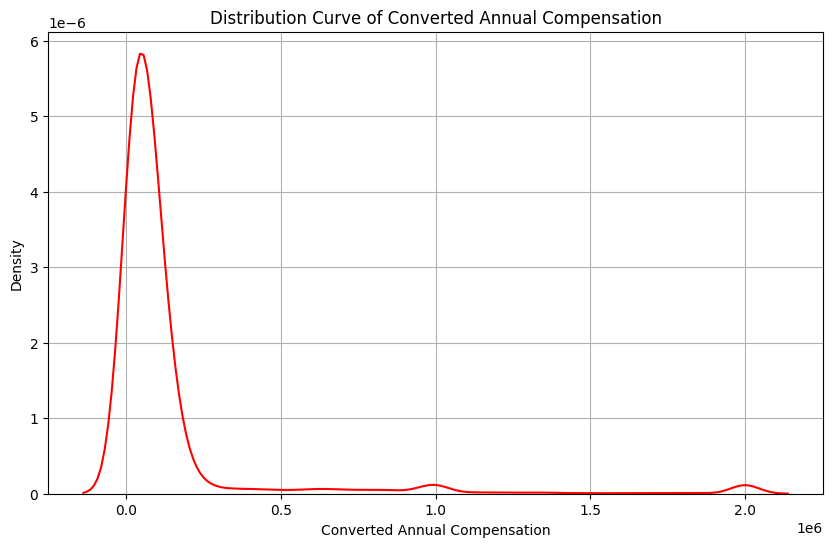

In [27]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='ConvertedComp', color='red')
plt.xlabel('Converted Annual Compensation')
plt.ylabel('Density')
plt.title('Distribution Curve of Converted Annual Compensation')
plt.grid(True)
plt.show()



Plot the histogram for the column `ConvertedComp`.


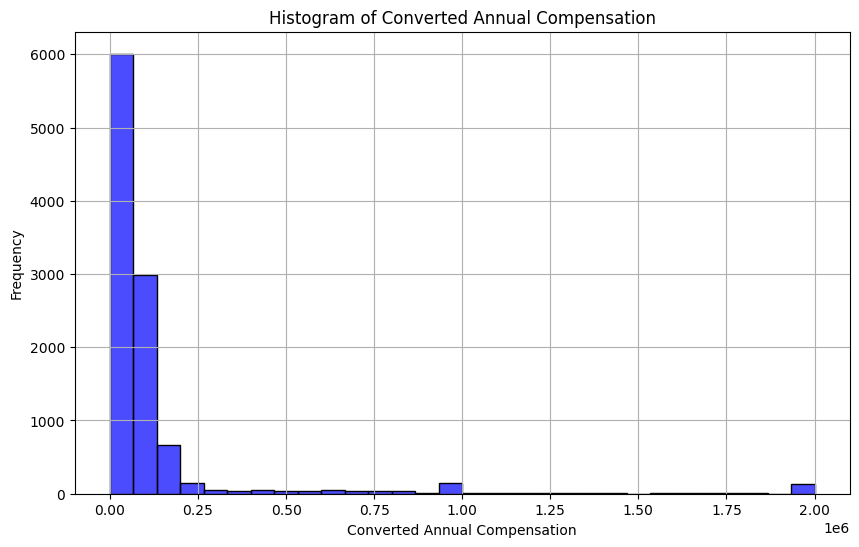

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(df['ConvertedComp'], bins=30, color='blue', kde=False, alpha=0.7)
plt.xlabel('Converted Annual Compensation')
plt.ylabel('Frequency')
plt.title('Histogram of Converted Annual Compensation')
plt.grid(True)
plt.show()


What is the median of the column `ConvertedComp`?


In [30]:
df['ConvertedComp'].median()


57745.0

How many responders identified themselves only as a **Man**?


In [31]:
df['Gender'].value_counts()

Gender
Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: count, dtype: int64

There are 10480 responders who identified themselves only as a Man.                                                   

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [32]:
median_woman_comp = df[df['Gender'] == 'Woman']['ConvertedComp'].median()
median_woman_comp 

57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [33]:
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


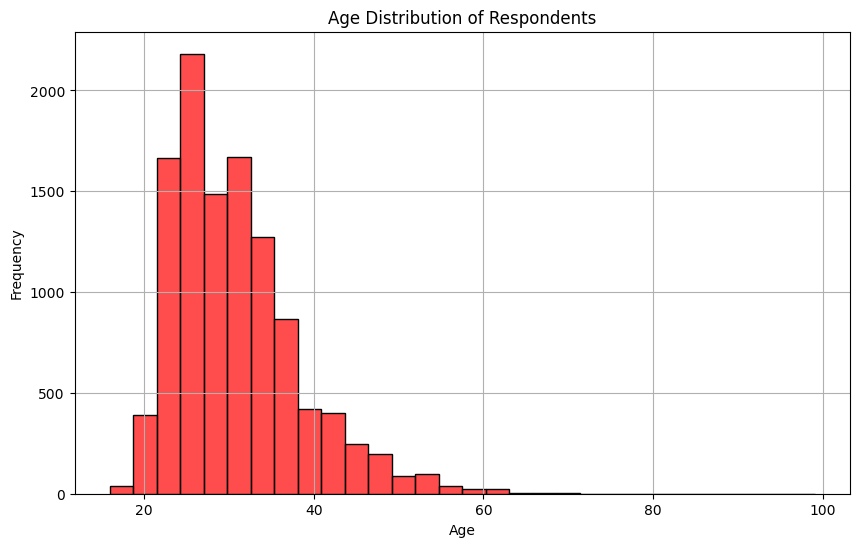

In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, color='Red', kde=False, alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Respondents')
plt.grid(True)
plt.show()


## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


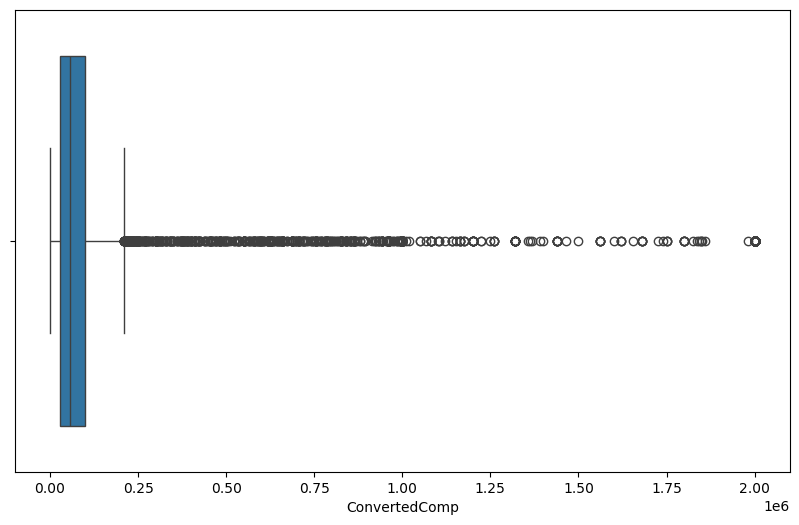

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x= 'ConvertedComp')
plt.show()


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [37]:
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)

print('Q1', Q1)
print('Q3', Q3)

IQR = Q3 - Q1
print('IQR', IQR)

Q1 26868.0
Q3 100000.0
IQR 73132.0


Find out the upper and lower bounds.


In [38]:
#Find Upper Bound
Upper_Bound = Q3 + 1.5 * IQR

#Find Lower Bound
Lower_Bound = Q1 - 1.5 * IQR

print(f'Upper Bound is {Upper_Bound} and Lower Bound is {Lower_Bound}')

Upper Bound is 209698.0 and Lower Bound is -82830.0


Identify how many outliers are there in the `ConvertedComp` column.


In [39]:
#Identify outliers
outliers = df[(df['ConvertedComp'] > Upper_Bound) | (df['ConvertedComp'] < Lower_Bound)]

#Count the number of outliers
num_outliers = outliers.shape[0]
num_outliers

879

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [42]:
#Count rows before removing the outliers from the ConvertedComp column.
df['ConvertedComp'].shape

(11398,)

In [43]:
outl_index = df[(df.ConvertedComp < Lower_Bound) | (df.ConvertedComp >  Upper_Bound)].index

df_outl = df.drop(outl_index)
print(df_outl.shape)


(10519, 85)


The original DataFrame df['ConvertedComp'] has 11,398 rows with 879 outliers. After removing them, df_outl has 10,519 rows.

In [57]:
#Check that df_outl is dataframe 
isinstance(df_outl, pd.DataFrame)

True

In [64]:
df_outl.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,10519.000000,9.710000e+03,9703.000000,10402.000000,8277.000000,10250.000000
mean,12488.961023,7.243963e+05,59883.208389,41.895813,4.809352,30.647298
std,7235.797316,7.184433e+06,43394.336755,24.301665,4.636411,7.352928
min,4.000000,0.000000e+00,0.000000,3.000000,0.000000,16.000000
25%,6257.500000,2.000000e+04,24060.000000,40.000000,2.000000,25.000000
50%,12483.000000,6.300000e+04,52704.000000,40.000000,4.000000,29.000000
75%,18789.500000,1.150000e+05,85574.500000,43.000000,5.000000,34.000000
max,25142.000000,3.900000e+08,209356.000000,1012.000000,99.000000,99.000000


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [70]:
df.dtypes

Respondent       int64
MainBranch      object
Hobbyist        object
OpenSourcer     object
OpenSource      object
                 ...  
Sexuality       object
Ethnicity       object
Dependents      object
SurveyLength    object
SurveyEase      object
Length: 85, dtype: object

In [74]:
#Select only numeric columns
numerical_df = df.select_dtypes(include=['number'])

#Calculate the correlation matrix for all numeric columns
correlation_matrix = numerical_df.corr()

#Extract the correlation values of 'Age' with other numeric columns
age_correlation = correlation_matrix['Age']

#Print the correlation values of 'Age' with other numeric columns
print(age_correlation)

Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
